# Лабораторна робота №8
## Тема:Структура даних «Граф». Алгоритми на графах
## Виконав: Варакута Олександр
## Група: КІ-24-1


## Мета: засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

## 1. Створення та подання графа


Список суміжності графа:
1 -> {2: 7, 3: 9, 6: 14}
2 -> {3: 10, 4: 15}
3 -> {4: 11, 6: 2}
6 -> {}
4 -> {5: 6}
5 -> {6: 9}



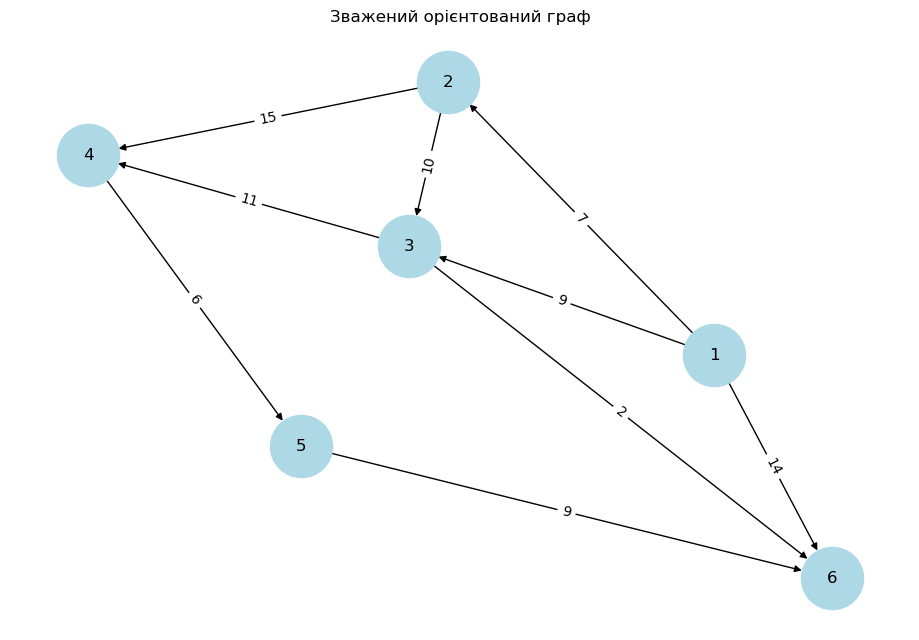

In [14]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_vertex(self, v):
        if v not in self.graph:
            self.graph[v] = {}

    def add_edge(self, u, v, weight=1):
        self.add_vertex(u)
        self.add_vertex(v)
        self.graph[u][v] = weight

    def vertices(self):
        return list(self.graph.keys())

    def neighbors(self, v):
        return self.graph[v]

    def __str__(self):
        result = ""
        for v in self.graph:
            result += f"{v} -> {self.graph[v]}\n"
        return result
G = Graph()

edges = [
    (1, 2, 7),
    (1, 3, 9),
    (1, 6, 14),
    (2, 3, 10),
    (2, 4, 15),
    (3, 4, 11),
    (3, 6, 2),
    (4, 5, 6),
    (5, 6, 9)
]

for u, v, w in edges:
    G.add_edge(u, v, w)

print("Список суміжності графа:")
print(G)

import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph()

for u in G.graph:
    for v, w in G.graph[u].items():
        nx_graph.add_edge(u, v, weight=w)

pos = nx.spring_layout(nx_graph, seed=42)

plt.figure(figsize=(9, 6))
nx.draw(nx_graph, pos, with_labels=True,
        node_size=2000, node_color="lightblue")
edge_labels = nx.get_edge_attributes(nx_graph, "weight")
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
plt.title("Зважений орієнтований граф")
plt.show()



## 2. Алгоритм Дейкстри


In [15]:
import heapq

def dijkstra_with_paths(graph, start):
    distances = {v: float('inf') for v in graph.vertices()}
    previous = {v: None for v in graph.vertices()}

    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_dist, current = heapq.heappop(pq)
        if current_dist > distances[current]:
            continue

        for neighbor, weight in graph.neighbors(current).items():
            new_dist = current_dist + weight
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                previous[neighbor] = current
                heapq.heappush(pq, (new_dist, neighbor))

    return distances, previous

def restore_path(prev, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = prev[current]
    path.reverse()
    return path if path[0] == start else None

distances, prev = dijkstra_with_paths(G, 1)

print("Найкоротші шляхи від вершини 1 (алгоритм Дейкстри):")
for v in distances:
    print(f"До вершини {v}: шлях = {restore_path(prev, 1, v)}, довжина = {distances[v]}")



Найкоротші шляхи від вершини 1 (алгоритм Дейкстри):
До вершини 1: шлях = [1], довжина = 0
До вершини 2: шлях = [1, 2], довжина = 7
До вершини 3: шлях = [1, 3], довжина = 9
До вершини 6: шлях = [1, 3, 6], довжина = 11
До вершини 4: шлях = [1, 3, 4], довжина = 20
До вершини 5: шлях = [1, 3, 4, 5], довжина = 26


## 3.Алгоритм Беллмана–Форда 



In [16]:
def bellman_ford_with_paths(graph, start):
    distances = {v: float('inf') for v in graph.vertices()}
    previous = {v: None for v in graph.vertices()}
    distances[start] = 0

    vertices = graph.vertices()

    for _ in range(len(vertices) - 1):
        for u in graph.graph:
            for v, w in graph.graph[u].items():
                if distances[u] + w < distances[v]:
                    distances[v] = distances[u] + w
                    previous[v] = u

    for u in graph.graph:
        for v, w in graph.graph[u].items():
            if distances[u] + w < distances[v]:
                raise ValueError("Граф містить від’ємний цикл")

    return distances, previous

bf_distances, bf_prev = bellman_ford_with_paths(G, 1)

print("Найкоротші шляхи від вершини 1 (алгоритм Беллмана–Форда):")
for v in bf_distances:
    print(f"До вершини {v}: шлях = {restore_path(bf_prev, 1, v)}, довжина = {bf_distances[v]}")


Найкоротші шляхи від вершини 1 (алгоритм Беллмана–Форда):
До вершини 1: шлях = [1], довжина = 0
До вершини 2: шлях = [1, 2], довжина = 7
До вершини 3: шлях = [1, 3], довжина = 9
До вершини 6: шлях = [1, 3, 6], довжина = 11
До вершини 4: шлях = [1, 3, 4], довжина = 20
До вершини 5: шлях = [1, 3, 4, 5], довжина = 26


## 4.Пошук у глибину 

In [17]:
def dfs(graph, start, visited=None, order=None):
    if visited is None:
        visited = set()
        order = []

    visited.add(start)
    order.append(start)

    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs(graph, neighbor, visited, order)

    return order

dfs_result = dfs(G, 1)
print("DFS обхід графа з вершини 1:")
print(dfs_result)


DFS обхід графа з вершини 1:
[1, 2, 3, 4, 5, 6]


 ## 4.Пошук у ширину (BFS)

In [18]:
from collections import deque

def bfs(graph, start):
    visited = set([start])
    queue = deque([start])
    order = []

    while queue:
        v = queue.popleft()
        order.append(v)

        for neighbor in graph.neighbors(v):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

    return order

bfs_result = bfs(G, 1)
print("BFS обхід графа з вершини 1:")
print(bfs_result)


BFS обхід графа з вершини 1:
[1, 2, 3, 6, 4, 5]


## 5. Пошук усіх можливих шляхів між двома вершинами

In [19]:
def find_all_paths(graph, start, end, path=None, all_paths=None):
    if path is None:
        path = []
    if all_paths is None:
        all_paths = []

    path = path + [start]

    if start == end:
        all_paths.append(path)
        return all_paths

    for neighbor in graph.neighbors(start):
        if neighbor not in path:  # запобігання циклам
            find_all_paths(graph, neighbor, end, path, all_paths)

    return all_paths

start_vertex = 1
end_vertex = 6

paths = find_all_paths(G, start_vertex, end_vertex)

print(f"Усі можливі шляхи від вершини {start_vertex} до вершини {end_vertex}:")
for i, p in enumerate(paths, 1):
    print(f"Шлях {i}: {p}")


Усі можливі шляхи від вершини 1 до вершини 6:
Шлях 1: [1, 2, 3, 4, 5, 6]
Шлях 2: [1, 2, 3, 6]
Шлях 3: [1, 2, 4, 5, 6]
Шлях 4: [1, 3, 4, 5, 6]
Шлях 5: [1, 3, 6]
Шлях 6: [1, 6]


## 6. Асимптотична складність алгоритмів


## Асимптотична складність алгоритмів для побудованого графа

Для графа:

- кількість вершин:  
$$
V = 6
$$

- кількість ребер:  
$$
E = 9
$$

### DFS та BFS

Часова складність обходів у глибину та у ширину визначається формулою:
$$
T(V, E) = O(V + E)
$$

Для графа:
$$
T = O(6 + 9) = O(15)
$$

---

### Алгоритм Дейкстри (з пріоритетною чергою)

Асимптотична складність:
$$
T(V, E) = O((V + E)\log V)
$$

Для графа:
$$
T = O((6 + 9)\log 6) = O(15 \log 6)
$$

---

### Алгоритм Беллмана–Форда

Асимптотична складність:
$$
T(V, E) = O(V \cdot E)
$$

Для  графа:
$$
T = O(6 \cdot 9) = O(54)
$$

## Пошук усіх можливих шляхів між двома вершинами
Пошук усіх можливих шляхів у графі має експоненційну складність,
оскільки кількість можливих шляхів може зростати дуже швидко.

У найгіршому випадку:
$$
T(V, E) = O(2^V)
$$

Тому даний алгоритм доцільно застосовувати лише для графів
з невеликою кількістю вершин.


## 7.Контрольні питання

### 1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

У термінах теорії графів **граф** — це математична структура, яка
складається з множини вершин та множини ребер, що з’єднують пари вершин.

Формально граф визначається як:
$$
G = (V, E)
$$
де:
- $V$ — множина вершин;
- $E$ — множина ребер.

Графи широко застосовуються для моделювання реальних систем, зокрема:
- дорожні мережі (вершини — перехрестя, ребра — дороги);
- комп’ютерні мережі (вершини — пристрої, ребра — канали зв’язку);
- соціальні мережі (вершини — користувачі, ребра — зв’язки між ними);
- транспортні маршрути;
- залежності між задачами у плануванні проєктів.

Завдяки універсальності графи дозволяють ефективно аналізувати складні
зв’язки між об’єктами.

### 2. Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.

Основні види графів:
- **орієнтовані графи**;
- **неорієнтовані графи**;
- **зважені графи**;
- **незважені графи**;
- **зв’язні та незв’язні графи**;
- **циклічні та ациклічні графи**.

У **неорієнтованому графі** ребро не має напрямку:
$$
(u, v) = (v, u)
$$

В **орієнтованому графі** кожне ребро має напрямок:
$$
(u, v) \neq (v, u)
$$

Основні відмінності:
- у неорієнтованому графі зв’язок між вершинами є двостороннім;
- в орієнтованому графі зв’язок має чіткий напрямок;
- орієнтовані графи використовуються для моделювання односторонніх
  відношень, наприклад, веб-посилань або потоків даних.
### 3. Як можна представити граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.

Основні способи подання графа у пам’яті комп’ютера:

1. **Матриця суміжності**  
   Це квадратна матриця розміру $V \times V$, де елемент
   $a_{ij}$ дорівнює 1 (або вазі ребра), якщо між вершинами $i$ та $j$
   існує ребро.

   Просторова складність:
   $$
   O(V^2)
   $$

2. **Список суміжності**  
   Для кожної вершини зберігається список її сусідів.

   Просторова складність:
 $$
   O(V + E)
$$

3. **Список ребер**  
   Граф подається у вигляді списку пар вершин (або трійок з вагами).

Список суміжності є найбільш ефективним для розріджених графів і
найчастіше використовується на практиці.

### 4. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.

Алгоритм **BFS (Breadth-First Search)** виконує обхід графа по рівнях,
починаючи з заданої вершини.

Основні кроки алгоритму:
1. початкова вершина додається до черги;
2. з черги послідовно вилучаються вершини;
3. всі невідвідані сусіди поточної вершини додаються до черги.

Алгоритм BFS використовує структуру даних **черга**.

Часова складність:
$$
T(V, E) = O(V + E)
$$

Приклади застосування BFS:
- пошук найкоротшого шляху в незважених графах;
- аналіз рівнів у соціальних мережах;
- пошук у ширину в лабіринтах;
- перевірка зв’язності графа.

### 5. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.

**DFS (Depth-First Search)** — це алгоритм обходу графа, який
заглиблюється в граф максимально можливо, перш ніж повертатися назад.

Алгоритм може бути реалізований рекурсивно або з використанням стеку.

Часова складність:
$$
T(V, E) = O(V + E)
$$

Основні відмінності між DFS і BFS:
- DFS використовує стек або рекурсію, BFS — чергу;
- DFS досліджує граф у глибину, BFS — по рівнях;
- DFS краще підходить для аналізу структури графа.

Приклади задач для DFS:
- пошук циклів у графі;
- топологічне сортування;
- аналіз зв’язних компонент;
- пошук усіх можливих шляхів між вершинами.
### 6. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

**Алгоритм Дейкстри** призначений для знаходження найкоротших шляхів
від заданої вершини до всіх інших вершин у зваженому графі.

Основна ідея алгоритму полягає у послідовному виборі вершини з
найменшою поточною відстанню та розслабленні ребер, що з неї виходять.

Асимптотична складність (з пріоритетною чергою):
$$
T(V, E) = O((V + E)\log V)
$$

Умови коректної роботи алгоритму Дейкстри:
- всі ваги ребер повинні бути **невід’ємними**;
- граф може бути орієнтованим або неорієнтованим;
- алгоритм не застосовується до графів з від’ємними вагами.

Алгоритм широко використовується у задачах маршрутизації,
навігаційних системах та телекомунікаційних мережах.

